In [28]:
# Importacion de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

%matplotlib inline

plt.style.use('default') # para graficos matplotlib
plt.rcParams['figure.figsize'] = (10, 8)

sns.set(style="whitegrid") # grid seaborn

pd.options.display.float_format = '{:20,.3f}'.format # notacion output

# Acceso a set de datos

In [2]:
path = "/home/seba/Escritorio/Datos/TP1/data/"
df_props_full = pd.read_csv(path + "train_dollar.csv")

In [3]:
df_props_full.columns

Index(['fecha', 'id', 'titulo', 'descripcion', 'tipodepropiedad', 'direccion',
       'ciudad', 'provincia', 'antiguedad', 'habitaciones', 'garages', 'banos',
       'metroscubiertos', 'metrostotales', 'idzona', 'lat', 'lng', 'gimnasio',
       'usosmultiples', 'piscina', 'escuelascercanas',
       'centroscomercialescercanos', 'Precio_MEX', 'MEX_to_USD', 'Precio_USD'],
      dtype='object')

# Conversión de tipos

In [4]:
df_props_full['fecha'] = pd.to_datetime(df_props_full['fecha'])

In [5]:
# Convierto todos los valores 1/0 a uint8
df_props_full['gimnasio'] = df_props_full['gimnasio'].astype('uint8')
df_props_full['usosmultiples'] = df_props_full['usosmultiples'].astype('uint8')
df_props_full['piscina'] = df_props_full['piscina'].astype('uint8')
df_props_full['escuelascercanas'] = df_props_full['escuelascercanas'].astype('uint8')
df_props_full['centroscomercialescercanos'] = df_props_full['centroscomercialescercanos'].astype('uint8')

In [6]:
# Convierto los representables en uint8. Utilizo el tipo de pandas UInt8Dtype para evitar conflicto con NaN
df_props_full['antiguedad'] = df_props_full['antiguedad'].astype(pd.UInt8Dtype())
df_props_full['habitaciones'] = df_props_full['habitaciones'].astype(pd.UInt8Dtype())
df_props_full['garages'] = df_props_full['garages'].astype(pd.UInt8Dtype())
df_props_full['banos'] = df_props_full['banos'].astype(pd.UInt8Dtype())

In [7]:
# Convierto los representables en uint16. Utilizo el tipo de pandas UInt16Dtype para evitar conflicto con NaN
df_props_full['metroscubiertos'] = df_props_full['metroscubiertos'].astype(pd.UInt16Dtype())
df_props_full['metrostotales'] = df_props_full['metrostotales'].astype(pd.UInt16Dtype())

In [8]:
# Convierto los representables en uint32. Utilizo el tipo de pandas UInt32Dtype para evitar conflicto con NaN
df_props_full['id'] = df_props_full['id'].astype(pd.UInt32Dtype())
df_props_full['idzona'] = df_props_full['idzona'].astype(pd.UInt32Dtype())
df_props_full['Precio_MEX'] = df_props_full['Precio_MEX'].astype(pd.UInt32Dtype())
df_props_full['Precio_USD'] = df_props_full['Precio_USD'].astype(pd.UInt32Dtype())

# Precio segun Antiguedad

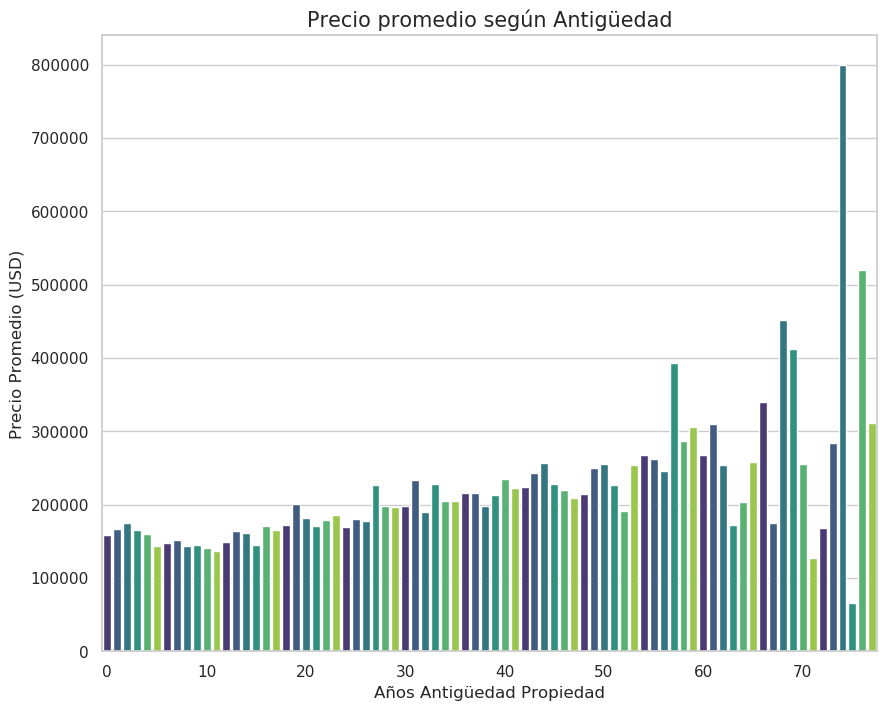

In [29]:
precio_antiguedad = df_props_full.groupby('antiguedad').agg({'Precio_USD':'mean'})
precio_antiguedad = precio_antiguedad.rename(columns={'Precio_USD':'Precio_promedio_USD'})
precio_antiguedad = precio_antiguedad.reset_index()

precio_fig = sns.barplot(data=precio_antiguedad, x='antiguedad',y='Precio_promedio_USD', orient='v', palette = (sns.color_palette("viridis",)))
precio_fig.set_title("Precio promedio según Antigüedad", fontsize = 15)
precio_fig.set_ylabel("Precio Promedio (USD)", fontsize = 12)
precio_fig.set_xlabel("Años Antigüedad Propiedad", fontsize = 12)

for ind, label in enumerate(precio_fig.get_xticklabels()):
    if ind %  10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

Se debe tener en cuenta al analizar este gráfico el hecho de que las publicaciones con más antiguedad tienen menor cantidad de publicaciones y esto posiblemente tenga un gran efecto sobre el precio promedio

# Crecimiento Precio a lo largo de los Años

In [10]:
df_props_full['year'] = df_props_full['fecha'].dt.year
df_props_full['month'] = df_props_full['fecha'].dt.month

In [11]:
precios_x_mes_mex = df_props_full.groupby(['year','month']).agg({'Precio_MEX':'mean'}).reset_index()
precios_x_mes_mex = pd.pivot_table(precios_x_mes_mex, index='year', columns=['month'])
precios_x_mes_mex.columns = precios_x_mes_mex.columns.droplevel()
precios_x_mes_mex

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2012,"1,910,287.347","1,817,814.980","1,966,355.141","2,167,271.068","1,899,123.957","1,930,387.499","1,827,298.644","2,116,829.445","2,092,779.595","2,228,156.793","2,188,356.604","1,894,107.712"
2013,"2,032,821.200","2,158,046.249","2,092,787.902","2,164,533.337","2,119,536.035","2,058,967.850","2,221,330.791","2,197,107.918","2,112,627.385","2,178,858.703","2,082,400.545","2,075,765.190"
2014,"2,194,886.648","2,327,648.595","2,268,508.581","2,360,990.836","2,312,619.622","2,357,716.971","2,358,129.595","2,345,645.647","2,430,108.505","2,262,678.245","2,429,326.673","2,553,107.229"
2015,"2,399,791.178","2,367,703.882","2,602,793.961","2,520,665.664","2,643,570.461","2,734,103.954","2,779,177.463","2,654,494.030","2,778,323.671","2,712,010.138","2,744,395.715","2,604,719.227"
2016,"2,688,369.646","2,695,539.529","2,807,389.074","2,827,182.842","2,726,719.660","2,744,906.100","2,882,329.836","2,880,278.121","2,918,303.509","2,825,196.142","2,824,474.063","2,792,976.583"


In [12]:
# Convierto fecha en un numero siendo 2012-01 = 1, 2012-02 = 2 ... 2013-01 = 13
def monthFrom2012_2016(date):
    year_from_2012 = (date.year - 2012) * 12
    month = date.month
    return year_from_2012 + month

In [13]:
historial_precio_mex = df_props_full.loc[:,['fecha','Precio_MEX']]
historial_precio_mex['fecha'] = historial_precio_mex['fecha'].apply(monthFrom2012_2016)
historial_precio_mex = historial_precio_mex.groupby('fecha').agg({'Precio_MEX':'mean'}).reset_index()
historial_precio_mex.columns = ['Mes','Precio_MEX_Promedio']
historial_precio_mex = historial_precio_mex.set_index('Mes')
historial_precio_mex

,Precio_MEX_Promedio
Mes,
1,"1,910,287.347"
2,"1,817,814.980"
3,"1,966,355.141"
4,"2,167,271.068"
5,"1,899,123.957"
6,"1,930,387.499"
7,"1,827,298.644"
8,"2,116,829.445"
9,"2,092,779.595"


Text(0, 0.5, 'Precio Promedio (MXN)')

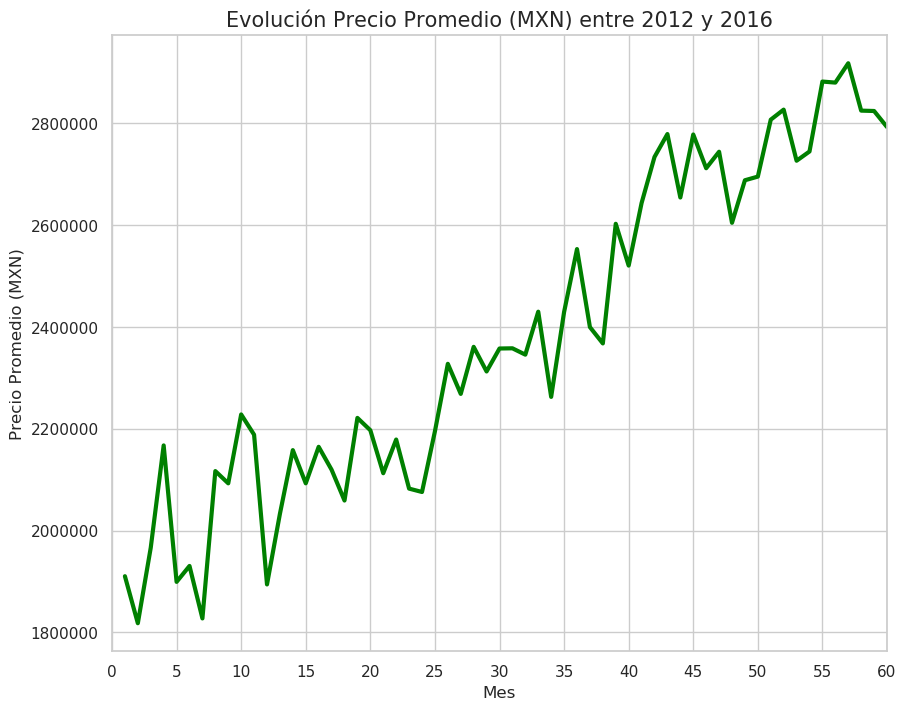

In [30]:
historial_precio_mex.plot.line(legend=False, color='green', linewidth=3)
plt.title("Evolución Precio Promedio (MXN) entre 2012 y 2016", fontsize = 15)
plt.xticks(ticks=np.arange(0,65,5))
plt.xlabel("Mes", fontsize = 12)
plt.ylabel("Precio Promedio (MXN)", fontsize = 12)

## Precio USD

In [15]:
precios_x_mes_usd = df_props_full.groupby(['year','month']).agg({'Precio_USD':'mean'}).reset_index()
precios_x_mes_usd = pd.pivot_table(precios_x_mes_usd, index='year', columns=['month'])
precios_x_mes_usd.columns = precios_x_mes_usd.columns.droplevel()
precios_x_mes_usd

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2012,"141,948.226","142,316.584","154,371.394","165,875.236","138,707.632","138,744.123","136,984.616","160,701.912","161,770.183","173,265.194","167,791.206","147,105.729"
2013,"159,880.146","169,828.682","166,717.241","177,485.402","172,415.671","159,119.081","174,256.275","169,908.746","162,169.637","167,686.330","159,378.610","160,100.757"
2014,"165,742.578","175,138.814","171,978.893","180,906.597","179,445.852","181,654.037","181,338.458","178,315.410","183,718.750","167,633.817","178,313.028","176,576.645"
2015,"162,930.215","158,535.671","170,696.997","166,000.485","173,046.522","176,688.220","174,566.643","160,555.422","164,697.399","163,902.167","164,975.417","152,670.250"
2016,"149,276.804","145,943.403","159,183.090","161,066.521","150,236.165","147,682.990","154,694.438","155,607.095","152,088.025","149,878.063","140,624.187","135,677.174"


In [16]:
historial_precio_usd = df_props_full.loc[:,['fecha','Precio_USD']]
historial_precio_usd['fecha'] = historial_precio_usd['fecha'].apply(monthFrom2012_2016)
historial_precio_usd = historial_precio_usd.groupby('fecha').agg({'Precio_USD':'mean'}).reset_index()
historial_precio_usd.columns = ['Mes','Precio_USD_Promedio']
historial_precio_usd = historial_precio_usd.set_index('Mes')

Text(0, 0.5, 'Precio Promedio (USD)')

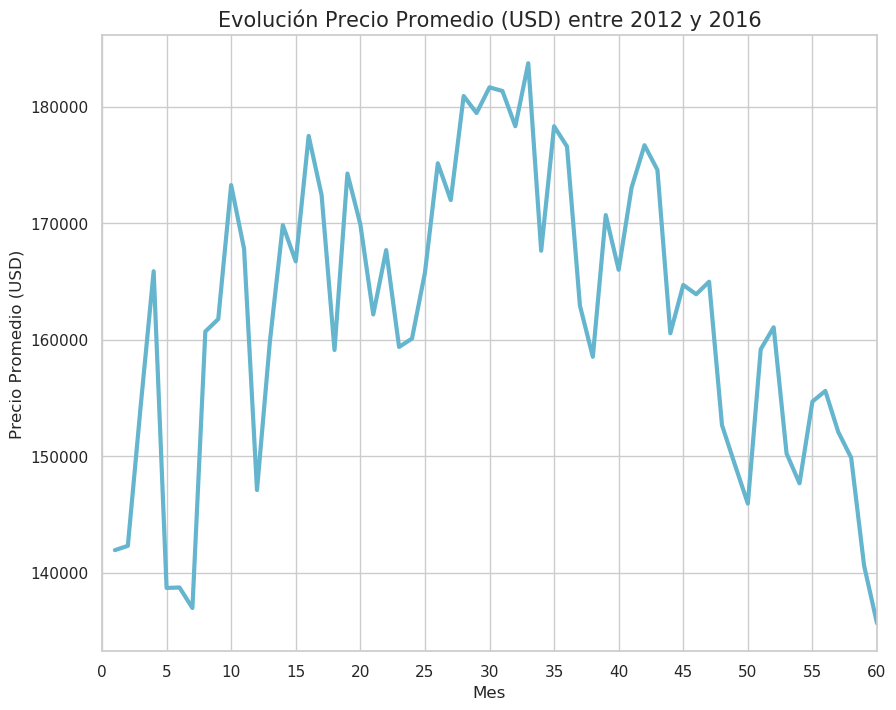

In [31]:
historial_precio_usd.plot.line(legend=False, color='c', linewidth=3)
plt.title("Evolución Precio Promedio (USD) entre 2012 y 2016", fontsize = 15)
plt.xticks(ticks=np.arange(0,65,5))
plt.xlabel("Mes", fontsize = 12)
plt.ylabel("Precio Promedio (USD)", fontsize = 12)

In [18]:
df_dollar = pd.read_csv(path + 'dollar.csv')
df_dollar = df_dollar.dropna()
df_dollar['Cierre'] = pd.to_numeric(df_dollar['Cierre'])
df_dollar['Cierre'] = df_dollar['Cierre'].round(3)
df_dollar['Fecha'] = pd.to_datetime(df_dollar['Fecha'], format='%d.%m.%Y')
df_dollar = df_dollar.set_index('Fecha')
df_dollar = df_dollar.loc[:, 'Cierre'].to_frame()

In [19]:
# Agrego fechas faltantes (Sabados y Domingos) con valor 0
idx = pd.date_range(start='2011-12-12', end='2017-01-31')
df_dollar = df_dollar.reindex(idx, fill_value=0)

In [20]:
# Cuando se trata de una fecha que corresponde a un Sabado o Domingo no se tiene infromación sobre Cierre
# Le asigno el valor correspondiente al Viernes previo
for i in range(0, len(df_dollar)):
    if (df_dollar.iloc[i]['Cierre'] == 0):
        df_dollar.iloc[i]['Cierre'] = df_dollar.iloc[i-1]['Cierre']

In [21]:
df_dollar['Cierre'] = 1 / df_dollar['Cierre']
df_dollar = df_dollar.loc['2012-01-01':'2016-12-31'] 
df_dollar.head(2)

,Cierre
2012-01-01,13.889
2012-01-02,13.889


In [22]:
df_dollar = df_dollar.reset_index()
df_dollar.head(1)

,index,Cierre
0,2012-01-01,13.889


In [23]:
df_dollar = df_dollar.rename(columns={'index':'fecha'})
df_dollar.head(1)

,fecha,Cierre
0,2012-01-01,13.889


In [24]:
df_dollar['fecha'] = pd.to_datetime(df_dollar['fecha'], format='%Y.%m.%d')
df_dollar['fecha'] = df_dollar['fecha'].apply(monthFrom2012_2016)

In [25]:
df_dollar.head(40)

,fecha,Cierre
0,1,13.889
1,1,13.889
2,1,13.699
3,1,13.699
4,1,13.699
5,1,13.699
6,1,13.699
7,1,13.699
8,1,13.699
9,1,13.699


In [26]:
dollarEvolution = df_dollar.groupby('fecha').agg({'Cierre':'mean'})
dollarEvolution

,Cierre
fecha,
1,13.392
2,12.770
3,12.737
4,13.050
5,13.655
6,13.900
7,13.329
8,13.181
9,12.916


Text(0, 0.5, 'Precio del Dólar (MXN)')

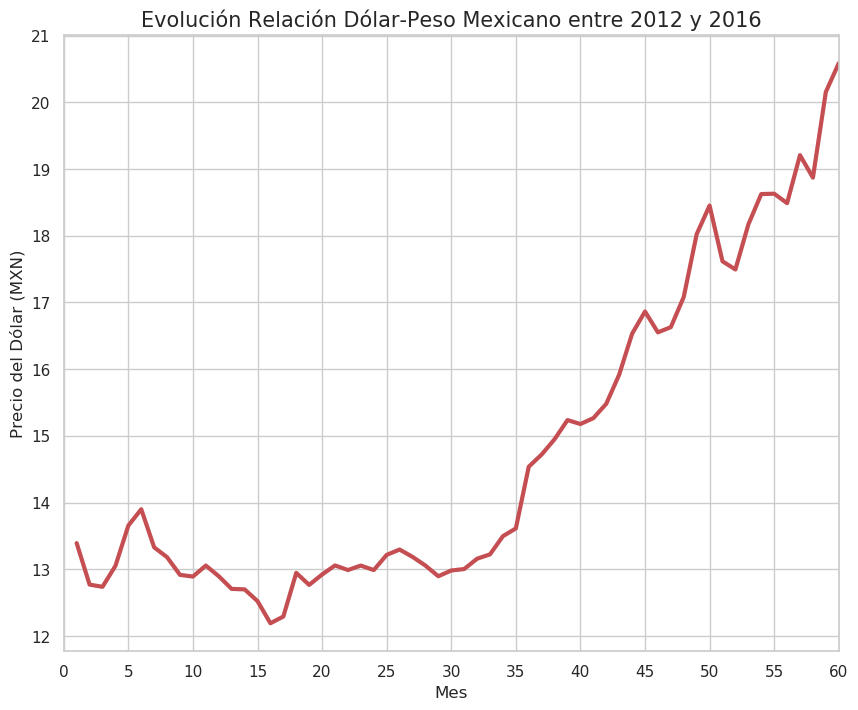

In [32]:
dollarEvolution.plot.line(legend=False, color='r', linewidth=3)
plt.title("Evolución Relación Dólar-Peso Mexicano entre 2012 y 2016", fontsize = 15)
plt.xticks(ticks=np.arange(0,65,5))
plt.yticks(ticks=np.arange(12,22,1))
plt.xlabel("Mes", fontsize = 12)
plt.ylabel("Precio del Dólar (MXN)", fontsize = 12)